<b>Vinicius F. Caridá</b>

<h1 style="text-align:center"> Machine Learning Hands-On </h1>

<h3 class="title"> Links úteis: </h3>
<br>
<ol>
  <li class="item"><a href = "http://scikit-learn.org/stable/"> Sklearn</a>: principal biblioteca de aprendizado de máquina para python.</li>
  <li class="item"><a href = "http://pandas.pydata.org/pandas-docs/stable/"> Pandas</a>: (quase) tudo o que você precisa para trabalhar rapidamente com tabelas</li>
  <li class="item"><a href = "https://docs.scipy.org/doc/numpy/reference/index.html"> Numpy</a>: funções matemáticas estão aqui</li>
  <li class="item"><a href = "https://matplotlib.org/contents.html"> Matplotlib</a>: te ajuda a plotar!</li>
  <li class="item"><a href = "https://seaborn.pydata.org/api.html"> Seaborn</a>: Deixa a matplotlib bonita (contém plots mais bem estruturados)</li>
</ol>

<b>Trabalharemos com as seguintes bases de dados:</b>
- iris.csv
- lenses_final.csv
- car.data
- horse-colic.data
- PETR4.SA.csv
- Boston.csv
- artificial_data

<b>Testem a leitura de um dos arquivos deste curso</b>
- Acessem a documentação da função <i>read_csv</i> do <i>pandas</i>: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [1]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {"axes.grid" : False})
sns.set_context('notebook')
np.random.seed(42)

In [2]:
iris            = pd.read_csv("./data/iris.csv")
lenses          = pd.read_csv("./data/lenses_final.csv")
car             = pd.read_csv("./data/cars.csv")
horsecolic      = pd.read_table("./data/horse-colic.data")

C:\Users\vinicius\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.


<h2 style="text-align:center; margin:40px"> Naive Bayes </h2>

![](img/bayes.png)

O <b>Naive Bayes</b> é um classificador (e somente classificador) que calcula probabilidades baseado nas frequências relativas das observações, utilizando uma <b>simplificação do Teorema de Bayes</b>.

<h3 style="text-align:center; margin:40px"> Teorema de Bayes </h3>

$$ P(A\,|\,B) = \frac{P(B\,|\,A)P(A)}{P(B)} $$

<h3 style="text-align:center; margin:40px"> Aplicando em Machine Learning... </h3>

$$ P(Y=C\,|\,X) = \frac{P(X\,|\,Y=C)P(Y=C)}{P(X)} $$

<h3 style="text-align:center; margin:40px"> P(X) pode ser considerado constante!! </h3>

$$ P(Y=C\,|\,X) \approx P(X\,|\,Y=C)P(Y=C) $$

<h3 style="text-align:center; margin:40px"> Vamos assumir que cada $X_i$ é independente? </h3>

$$ P(Y=C\,|\,X) \approx P(Y=C) \prod_{i=1}^{N} P(X_i\,|\,Y=C)$$

<h3 style="text-align:center; margin:40px"> Exemplo prático - Jogar Tennis </h3>

![](img/tennis1.png)

<h3 style="text-align:center; margin:40px"> Aplicando a fórmula </h3>

$$ P(Decisão\,|\,X) \approx P(Decisão)*P(X\,|\,Decisão)$$

$$ P(Decisão\,|\,X) \approx P(Decisão)*P(Aspecto\,|\,Decisão)*P(Temperatura\,|\,Decisão)*P(Umidade\,|\,Decisão)*P(Vento\,|\,Decisão)$$

$$ P(Decisão = N) = \frac{5}{14} = 0.3571$$

$$ P(Decisão = S) = \frac{9}{14} = 0.6428$$

![](img/tennis2.png)

![](img/tennis3.png)

$$ P(Decisão=N\,|\,X)=0.36*0.60*0.20*0.80*0.60=0.0207 $$

$$ P(Decisão=S\,|\,X)=0.64*0.22*0.33*0.33*0.33=0.0050 $$

<h3 style="text-align:center; margin:40px"> Conclusão : Não jogar tennis! </h3>

<h3> Scikit-Learn </h3>
Agora, vamos rodar os códigos abaixo que usam uma implementação do algoritmo disponível no pacote <i>sklearn</i> (Scikit-Learn).

In [3]:
from sklearn.naive_bayes import GaussianNB

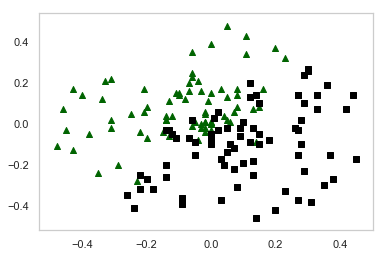

In [4]:
baseDados = pd.read_csv('data/base_regressao_logistica.csv')
plt.scatter(baseDados.X1[baseDados.Y == 0], baseDados.X2[baseDados.Y == 0], c = 'darkgreen', marker = '^')
plt.scatter(baseDados.X1[baseDados.Y == 1], baseDados.X2[baseDados.Y == 1], c = 'black', marker = ',')

In [5]:
NB = GaussianNB()
X = baseDados.loc[:, baseDados.columns != 'Y']
Y = baseDados.Y
NB.fit(X,Y)

GaussianNB(priors=None)

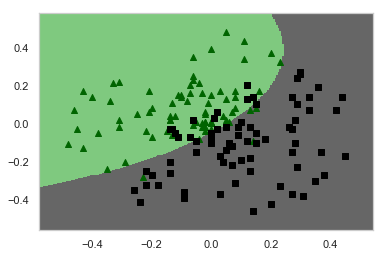

In [6]:
x_min, x_max = baseDados.X1.min() - .1, baseDados.X1.max() + .1
y_min, y_max = baseDados.X2.min() - .1, baseDados.X2.max() + .1
h = .005
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = NB.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Accent)

pred = NB.predict(X)
plt.scatter(baseDados.X1[Y == 0], baseDados.X2[Y == 0], c = 'darkgreen', marker = '^')
plt.scatter(baseDados.X1[Y == 1], baseDados.X2[Y == 1], c = 'black', marker = ',')